In [136]:
##%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["axes.grid"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [10, 7]

In [137]:
data = np.loadtxt("test.csv", dtype=float, delimiter=",")

N = 48
L = N
K = 1
rMax = 1
kT = 0.1*K*rMax*rMax

In [138]:
def timeAverage(arr):
    n = len(arr)

    numerator = np.cumsum(arr)
    denominator = np.arange(1, n+1)

    return numerator/denominator

In [139]:
time = data[:,-1]
Epot = data[:,-2]
Ekin = data[:,-3]

E = Epot + Ekin

pos = data[:,:3*N]
mom = data[:,3*N:6*N]

x = data[0, 0:3*N:3]
y = data[0, 1:3*N+1:3]
z = data[0, 2:3*N+2:3]


In [140]:
np.amax(pos), np.amax(mom), (len(data[0,:])-3)/6

(5.77944, 1.55717, 48.0)

## Position

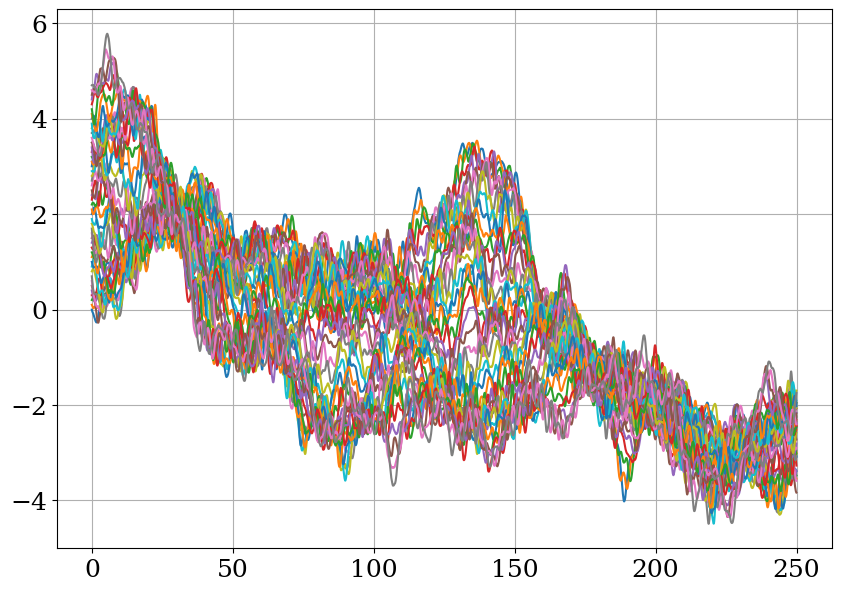

In [141]:
for i in range(N):
    plt.plot(time, pos[:,3*i])

#plt.xlim(2,4)


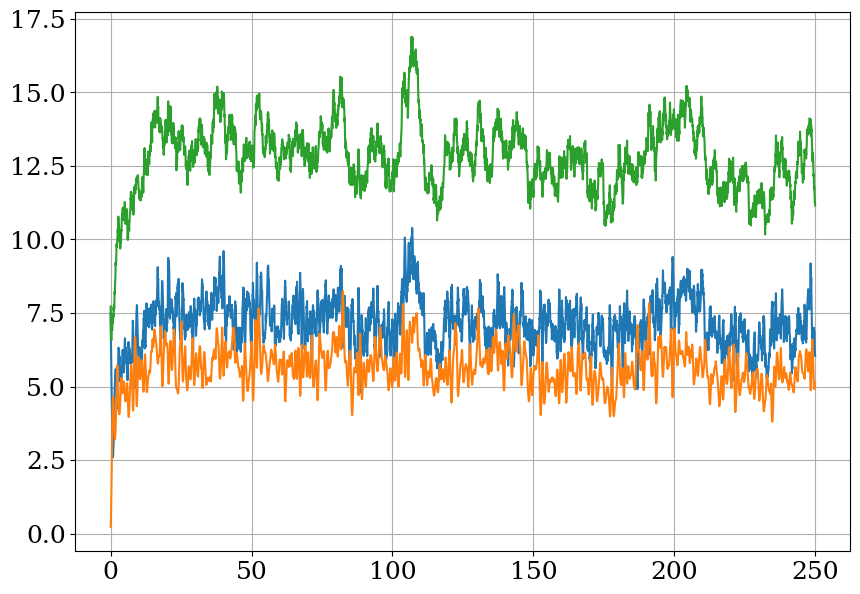

In [142]:
cut = 10000

plt.plot(time[:cut], Ekin[:cut])
plt.plot(time[:cut], Epot[:cut])
plt.plot(time[:cut], Epot[:cut]+Ekin[:cut])

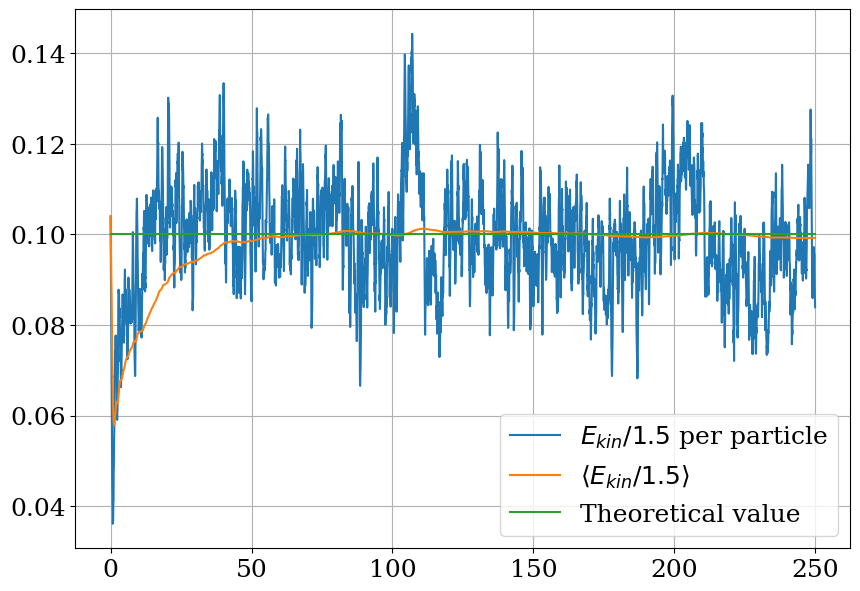

In [159]:
plt.plot(time, Ekin/(1.5*N), label = "$E_{kin}/1.5N$ ")
plt.plot(time, timeAverage(Ekin/(1.5*N)), label = "$\leftangle E_{kin}/1.5N \\rightangle$")
plt.plot([time[0], time[-1]], [0.1, 0.1], label = "Theoretical value")
plt.legend()

In [144]:
np.mean(Ekin/(1.5*N)), np.var(Ekin/(1.5*N)), np.std(Ekin)

(0.0992341186388889, 0.00014461002196024348, 0.8658281318147975)

In [145]:
np.mean(Epot), np.var(Epot), np.std(Epot)

(5.6439118574, 0.4972028235855163, 0.705126104739795)

In [146]:
np.mean(Epot+Ekin), np.var(Epot+Ekin), np.std(Epot+Ekin)

(12.788768399399999, 1.3871447490485405, 1.1777710936546797)

## End-to-End distance

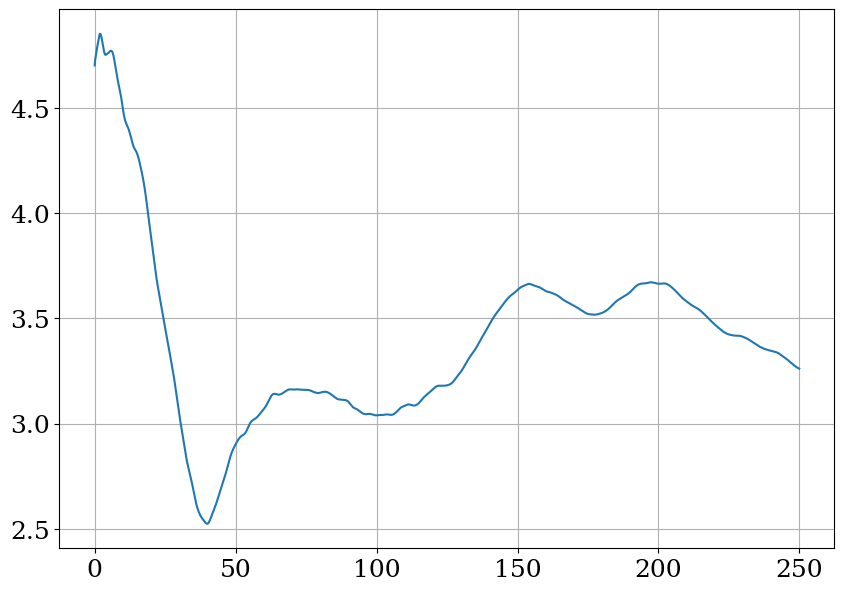

In [147]:
dx = pos[:,0] - pos[:,(N-1)*3]
dx -= np.round(dx / L) * L
dy = pos[:,1] - pos[:,(N-1)*3+1]
dy -= np.round(dy / L) * L
dz = pos[:,2] - pos[:,(N-1)*3+2]
dz -= np.round(dz / L) * L
endtoend = np.sqrt(dx*dx+dy*dy+dz*dz)


plt.plot(time, timeAverage(endtoend))

In [148]:
np.mean(endtoend)

3.2612639662279426

## Radius of gyration

In [149]:
x = pos[:,::3]
y = pos[:,1::3]
z = pos[:,2::3]

M = N

CMx = 1/M * np.sum(x, axis = 1)
CMy = 1/M * np.sum(y, axis = 1)
CMz = 1/M * np.sum(z, axis = 1)

Rg = np.zeros_like(CMx)

for i in range(len(CMx)):
    Rg[i] = 1/M * (sum((x[i,:] - CMx[i])**2) + sum((y[i,:] - CMy[i])**2) + sum((z[i,:] - CMz[i])**2))

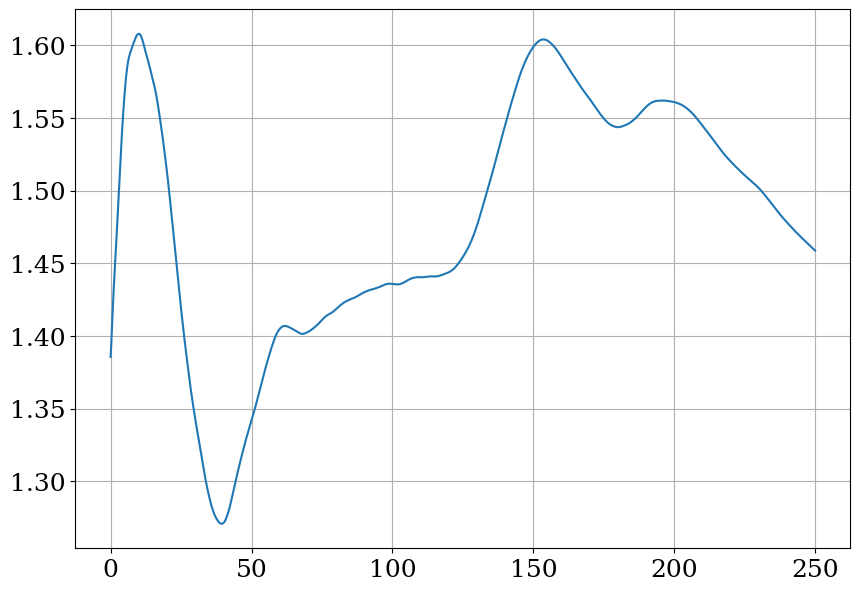

In [150]:
plt.plot(time, np.sqrt(timeAverage(Rg)))

In [151]:
np.mean(np.sqrt(Rg))

1.4011336384774655

In [152]:
np.mean(Rg), np.mean(Rg)*6, np.mean(endtoend**2)

(2.1279046111100195, 12.767427666660117, 13.180658467556245)

## Specific heat

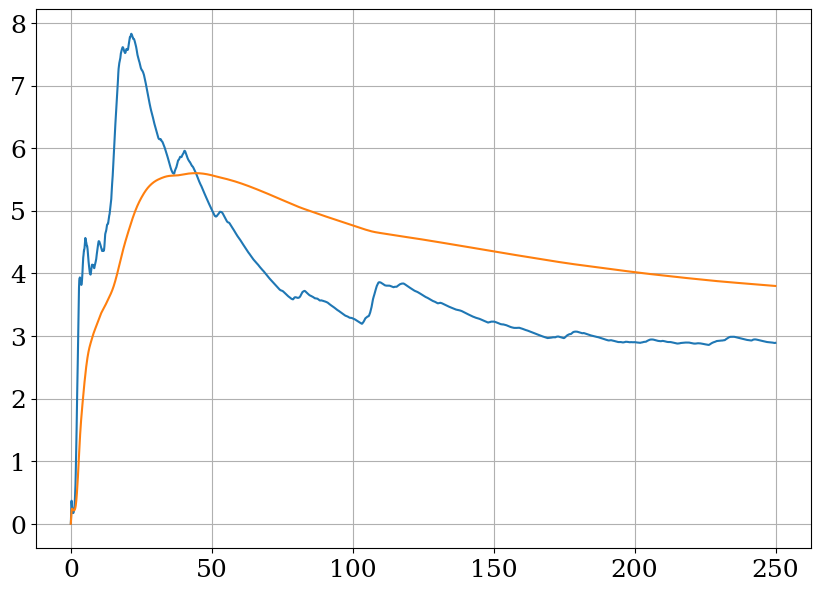

In [153]:
E_fluc = timeAverage(E**2) - timeAverage(E)**2

cV = E_fluc/(N*kT**2)

plt.plot(time,cV)
plt.plot(time,timeAverage(cV))


In [154]:
cV[-1], timeAverage(cV)[-1]

(2.8898848938515793, 3.798693915549874)

# Problem B

In [160]:
#The simulation will take 2.000.000 steps, but we only save 10.000
data48 = np.loadtxt("48HighRes.csv", dtype=float, delimiter=",") 
#data48 = np.loadtxt("48particleLoopLong.csv", dtype=float, delimiter=",")
data96 = np.loadtxt("96HighRes.csv", dtype=float, delimiter=",")
#data96 = np.loadtxt("96particleLoopLong.csv", dtype=float, delimiter=",")

time48 = data48[:,-1]
pos48 = data48[:,:3*48]
Epot48 = data48[:,-2]
Ekin48 = data48[:,-3]

time96 = data96[:,-1]
pos96 = data96[:,:3*96]
Epot96 = data96[:,-2]
Ekin96 = data96[:,-3]


In [163]:
particleIndex = 8

def unwrap(arr, L):
    unwrapped_arr = np.copy(arr)
    length = len(arr)
    for i in range(length-1):
        if(abs(arr[i] - arr[i+1]) > L/2):
            start = np.zeros(i+1)
            end = np.ones(length-i-1) * L * np.sign(arr[i] - arr[i+1])
            adding = np.concatenate((start, end))

            unwrapped_arr += adding
    return unwrapped_arr
     


def relative_position(particleIndex, pos, L):
    initx = pos[0,3*particleIndex]
    inity = pos[0,3*particleIndex+1]
    initz = pos[0,3*particleIndex+2]

    #initPos = np.sqrt(initx**2 + inity**2 + initz**2)

    rel_posx = unwrap(pos[:,3*particleIndex], L) - initx
    rel_posy = unwrap(pos[:,3*particleIndex+1], L) - inity
    rel_posz = unwrap(pos[:,3*particleIndex+2], L) - initz

    rel_distance = rel_posx**2 + rel_posy**2 + rel_posz**2

    return rel_distance

rel_distance48 = relative_position(particleIndex, pos48, 48/3)
rel_distance96 = relative_position(particleIndex, pos96, 96/3)


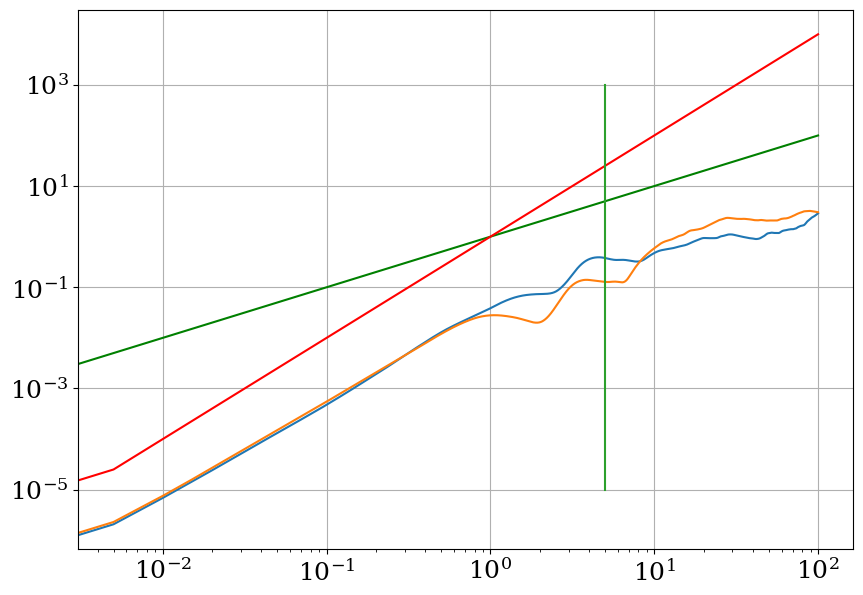

In [167]:

plt.plot(time48, timeAverage(rel_distance48), label = "48 particles")
plt.plot(time96, timeAverage(rel_distance96), label = "96 particles")
plt.plot(time48, time48)
plt.plot(time48, time48**2)
plt.plot([5,5],[1e-5, 1e3])
plt.xscale('log')
plt.yscale('log')